## Interpolation
Interpolation is a method to estimate unknown values between known data.
In image processing, interpolation used for transfomation image like resizing, rotating, or wraping with image grid.

## Interpolation Methods
- **Nearest Neighbor:** It assign nearest pixel value to new pixel values.
- **Bilinear:** It set an average weighted four nearest pixel value to new pixel value.
- **Bicubic:** It set an average weighted 16 nearest pixel value to new pixel value.
- **Lanczos:** It used sinc function for a higher quality result

## Image Transformation



In [22]:
# import libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

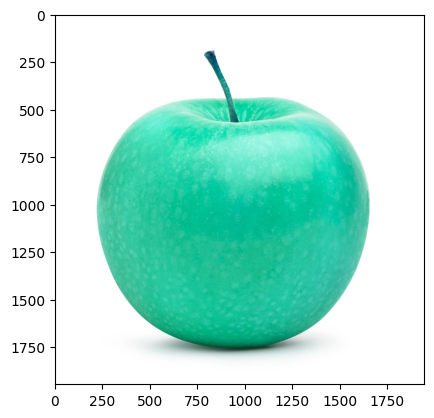

In [23]:
# load data
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/invskills-cv/assignmentSession4/img1.webp')
plt.imshow(img)

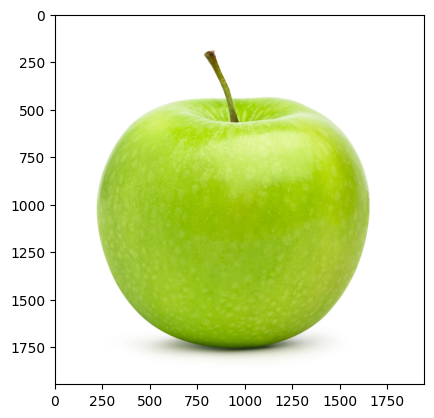

In [24]:
# convert BGR to RGB
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [25]:
# gemetric transformations
def geometricTransformations(img):
  transform = [
        ('Original', img),
        ('Resize (Half)', cv2.resize(img, None, fx=0.5, fy=0.5)),
        ('Resize (Double)', cv2.resize(img, None, fx=2, fy=2)),
        ('Rotate 45°', cv2.warpAffine(img, cv2.getRotationMatrix2D((img.shape[1]//2, img.shape[0]//2), 45, 1.0), (img.shape[1], img.shape[0]))),
        ('Flip Horizontally', cv2.flip(img, 1)),
        ('Flip Vertically', cv2.flip(img, 0)),
        ('Shear', cv2.warpAffine(img, np.float32([[1, 0.5, 0], [0.5, 1, 0]]), (img.shape[1], img.shape[0]))),
        ('Translation', cv2.warpAffine(img, np.float32([[1, 0, 100], [0, 1, 50]]), (img.shape[1], img.shape[0]))),
        ('Perspective', cv2.warpPerspective(img, cv2.getPerspectiveTransform(np.float32([[0,0],[img.shape[1],0],[0,img.shape[0]],[img.shape[1],img.shape[0]]]), np.float32([[50,50],[img.shape[1]-50,50],[50,img.shape[0]-50],[img.shape[1]-50,img.shape[0]-50]])), (img.shape[1], img.shape[0]))),
        ('Rotation + Resize', cv2.resize(cv2.warpAffine(img, cv2.getRotationMatrix2D((img.shape[1]//2, img.shape[0]//2), 30, 1.0), (img.shape[1], img.shape[0])), (img.shape[1]//2, img.shape[0]//2))),
    ]
  return transform

In [26]:
# apply transformation
transform_img = geometricTransformations(img)

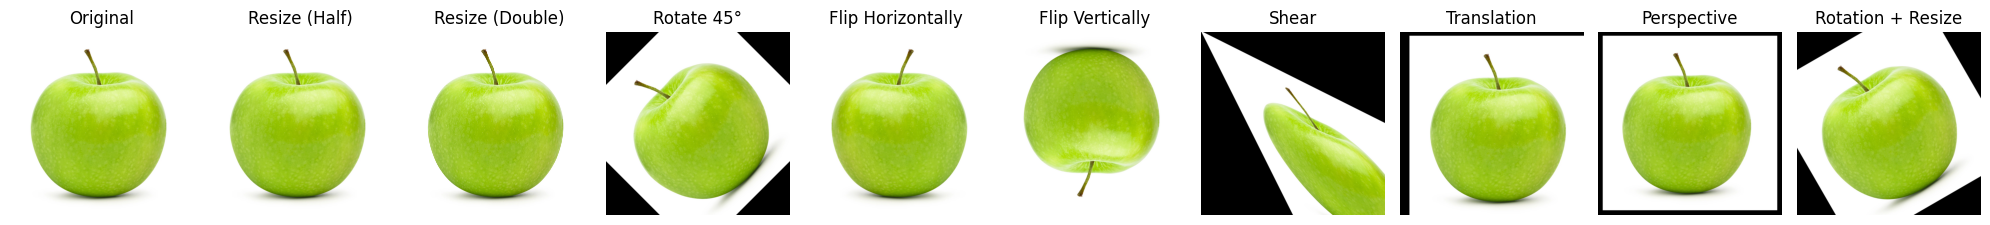

In [28]:
# display all in a single output
fig, axes = plt.subplots(1, 10, figsize=(20, 10))
axes = axes.ravel()
for i in range(10):
    axes[i].imshow(transform_img[i][1])
    axes[i].set_title(transform_img[i][0])
    axes[i].axis('off')
plt.tight_layout()
plt.show()

## Resize with Diffrent Interpolation Methods

In [29]:
nearest = cv2.resize(img, None, fx=2, fy=2, interpolation=cv2.INTER_NEAREST)
bilinear = cv2.resize(img, None, fx=2, fy=2, interpolation=cv2.INTER_LINEAR)
bicubic = cv2.resize(img, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)

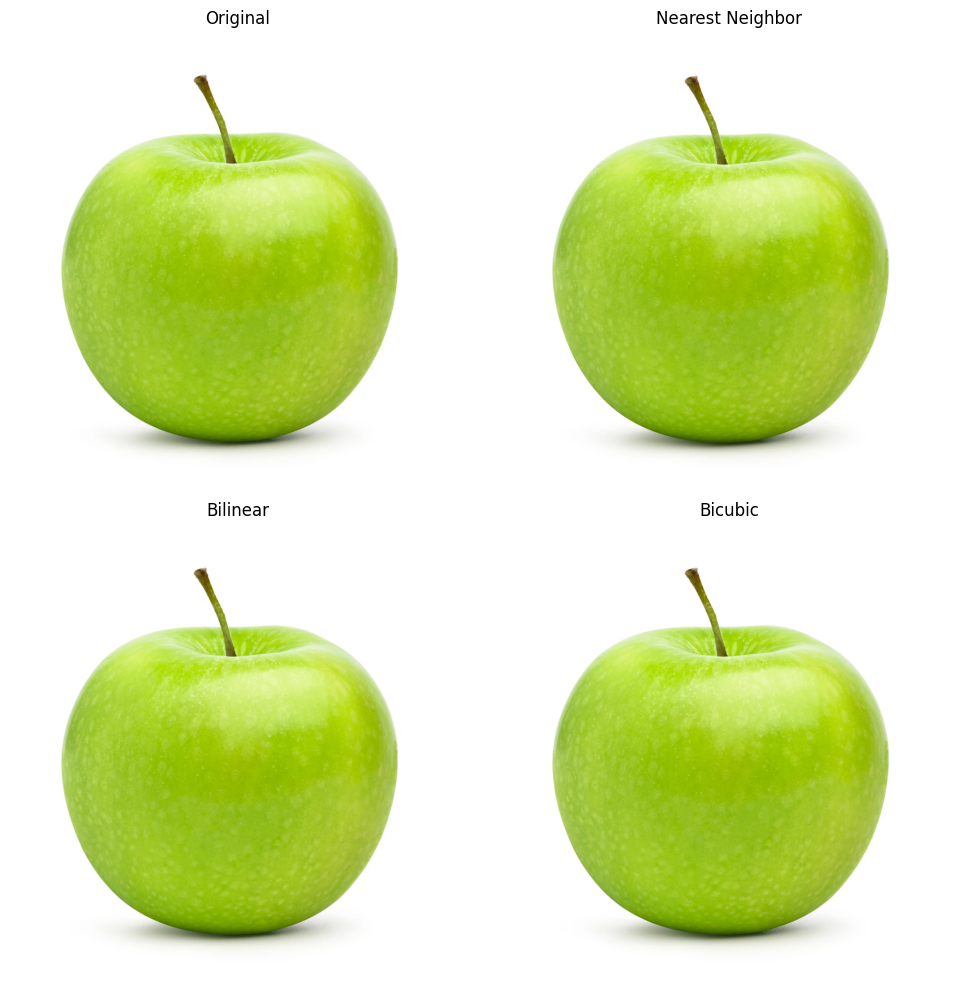

In [30]:
# display in a 2*2 grid
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
axes[0, 0].imshow(img)
axes[0, 0].set_title('Original')

axes[0, 1].imshow(nearest)
axes[0, 1].set_title('Nearest Neighbor')

axes[1, 0].imshow(bilinear)
axes[1, 0].set_title('Bilinear')

axes[1, 1].imshow(bicubic)
axes[1, 1].set_title('Bicubic')

for ax in axes.ravel():
    ax.axis('off')

plt.tight_layout()
plt.show()